# Hyper Parameter Tuning

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [15]:
# Fetching dataset
age_prediction = pd.read_csv("data/NHANES_age_prediction.csv")
age_prediction

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [16]:
X = age_prediction.iloc[:,3:]
y = age_prediction["age_group"]
print(X.head())

   RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN
0       2.0     2.0    35.7   110.0     2.0   150.0  14.91
1       2.0     2.0    20.3    89.0     2.0    80.0   3.85
2       1.0     2.0    23.2    89.0     2.0    68.0   6.14
3       1.0     2.0    28.9   104.0     2.0    84.0  16.15
4       2.0     1.0    35.9   103.0     2.0    81.0  10.92


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y= le.fit_transform(y)
print(y)

[0 0 0 ... 0 0 0]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### SVM-RBF

In [19]:
from sklearn.svm import SVC
rbf_kernel_svm = SVC(kernel="rbf",random_state=42)

rbf_kernel_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [20]:

from sklearn.model_selection import GridSearchCV

hyp_param_grid1 = [{'C':[i for i in range(1,10)],
                   'gamma':np.linspace(0.1,1,10)}]

rbf_search = GridSearchCV(estimator=rbf_kernel_svm,param_grid=hyp_param_grid1,cv=5)
rbf_search.fit(X_train_std,y_train)

print(rbf_search.best_params_)
print(rbf_search.best_score_)
print(rbf_search.best_estimator_)


{'C': 2, 'gamma': 0.8}
0.8483665174666873
SVC(C=2, gamma=0.8, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       479
           1       0.53      0.11      0.18        91

    accuracy                           0.84       570
   macro avg       0.69      0.55      0.55       570
weighted avg       0.80      0.84      0.80       570



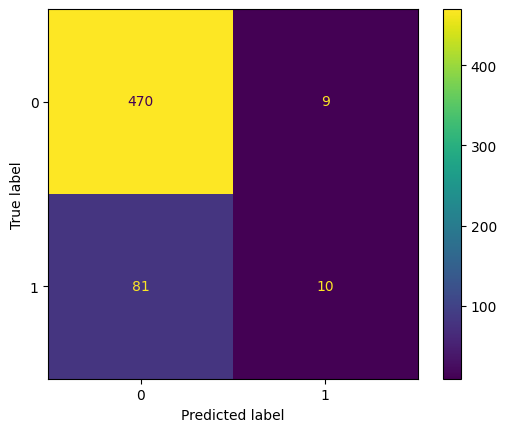

F1-score: 0.7959492730059925


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

rbf_hyper = SVC(kernel="rbf",C=2,gamma=0.8,random_state=42)
rbf_hyper.fit(X_train_std,y_train)
rbf_predictions = rbf_hyper.predict(X_test_std)

print("Classification Report:")
print(classification_report(y_test, rbf_predictions))

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, rbf_predictions))
disp.plot()
plt.show()

print("F1-score:",f1_score(y_test,rbf_predictions,average='weighted'))



### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [71]:
from sklearn.model_selection import RandomizedSearchCV

hyp_param_grid2 = {'max_depth':[i for i in range(1,35,3)],
                   'max_leaf_nodes':[i for i in range(10,50,5)],
                   'max_features':[i for i in range(1,8)]}

dt_search = RandomizedSearchCV(estimator=dt,param_distributions=hyp_param_grid2,cv=5)
dt_search.fit(X_train_std,y_train)

print(dt_search.best_params_)
print(dt_search.best_score_)
print(dt_search.best_estimator_)


{'max_leaf_nodes': 15, 'max_features': 4, 'max_depth': 13}
0.837817907427415
DecisionTreeClassifier(max_depth=13, max_features=4, max_leaf_nodes=15,
                       random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       479
           1       0.56      0.16      0.25        91

    accuracy                           0.85       570
   macro avg       0.71      0.57      0.58       570
weighted avg       0.81      0.85      0.81       570



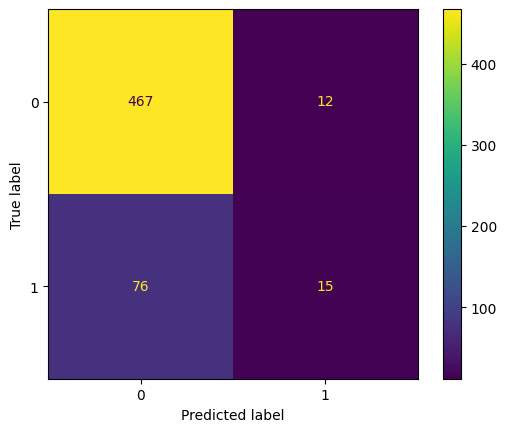

F1-score: 0.8085806575877819


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

dt_hyper = DecisionTreeClassifier(max_depth=13,max_leaf_nodes=15,max_features=4,random_state=42)
dt_hyper.fit(X_train_std,y_train)
dt_predictions = dt_hyper.predict(X_test_std)

print("Classification Report:")
print(classification_report(y_test, dt_predictions))

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, dt_predictions))
disp.plot()
plt.show()

print("F1-score:",f1_score(y_test,dt_predictions,average='weighted'))

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [118]:
from sklearn.model_selection import RandomizedSearchCV

hyp_param_grid3 = {'n_estimators':[i for i in range(10,101,10)],
                   'max_depth':[i for i in range(1,35,3)],
                   'max_leaf_nodes':[i for i in range(10,50,5)],
                   'max_features':[i for i in range(1,8)]}

rf_search = RandomizedSearchCV(estimator=rf,param_distributions=hyp_param_grid3,cv=5)
rf_search.fit(X_train_std,y_train)

print(rf_search.best_params_)
print(rf_search.best_score_)
print(rf_search.best_estimator_)

{'n_estimators': 80, 'max_leaf_nodes': 35, 'max_features': 5, 'max_depth': 13}
0.846603556790314
RandomForestClassifier(max_depth=13, max_features=5, max_leaf_nodes=35,
                       n_estimators=80, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       479
           1       0.71      0.13      0.22        91

    accuracy                           0.85       570
   macro avg       0.78      0.56      0.57       570
weighted avg       0.83      0.85      0.81       570



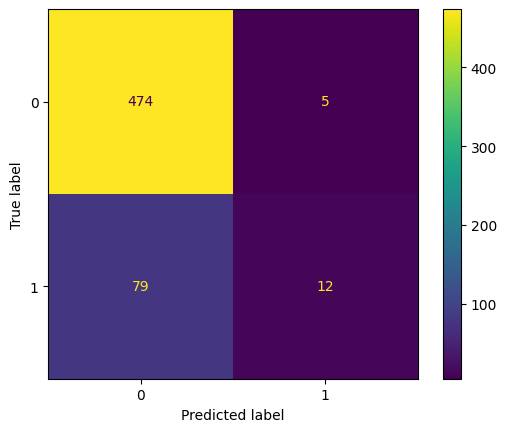

F1-score: 0.8074278072442087


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

rf_hyper = RandomForestClassifier(n_estimators=80,max_depth=13,max_leaf_nodes=35,max_features=5,random_state=42)
rf_hyper.fit(X_train_std,y_train)
rf_predictions = rf_hyper.predict(X_test_std)

print("Classification Report:")
print(classification_report(y_test, rf_predictions))

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, rf_predictions))
disp.plot()
plt.show()

print("F1-score:",f1_score(y_test,rf_predictions,average='weighted'))

### Ada Boost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)

ab.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [96]:
from sklearn.model_selection import RandomizedSearchCV

hyp_param_grid4 = {'n_estimators':[i for i in range(10,101,10)],
                   'learning_rate':[0.1,0.2,0.4,0.6,0.7,0.9]}

ab_search = RandomizedSearchCV(estimator=ab,param_distributions=hyp_param_grid4,cv=5)
ab_search.fit(X_train_std,y_train)

print(ab_search.best_params_)
print(ab_search.best_score_)
print(ab_search.best_estimator_)

{'n_estimators': 90, 'learning_rate': 0.4}
0.8448491708254018
AdaBoostClassifier(learning_rate=0.4, n_estimators=90, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       479
           1       0.58      0.16      0.26        91

    accuracy                           0.85       570
   macro avg       0.72      0.57      0.59       570
weighted avg       0.82      0.85      0.81       570



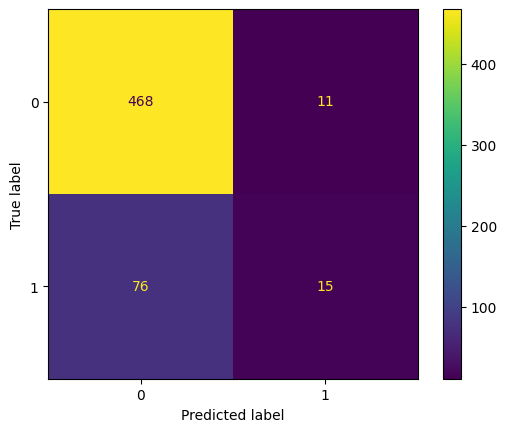

F1-score: 0.8098197595650906


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

ab_hyper = AdaBoostClassifier(n_estimators=90,learning_rate=0.4,random_state=42)
ab_hyper.fit(X_train_std,y_train)
ab_predictions = ab_hyper.predict(X_test_std)

print("Classification Report:")
print(classification_report(y_test, ab_predictions))

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, ab_predictions))
disp.plot()
plt.show()

print("F1-score:",f1_score(y_test,ab_predictions,average='weighted'))

### Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [116]:
from sklearn.model_selection import RandomizedSearchCV

hyp_param_grid5 = {'n_estimators':[i for i in range(10,101,10)],
                   'learning_rate':[0.1,0.2,0.4,0.6,0.7,0.9],
                   'max_depth':[i for i in range(1,35,3)]}

gb_search = RandomizedSearchCV(estimator=gb,param_distributions=hyp_param_grid5,cv=5)
gb_search.fit(X_train_std,y_train)

print(gb_search.best_params_)
print(gb_search.best_score_)
print(gb_search.best_estimator_)

{'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.4}
0.8448491708254018
GradientBoostingClassifier(learning_rate=0.4, max_depth=1, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       479
           1       0.47      0.15      0.23        91

    accuracy                           0.84       570
   macro avg       0.66      0.56      0.57       570
weighted avg       0.80      0.84      0.80       570



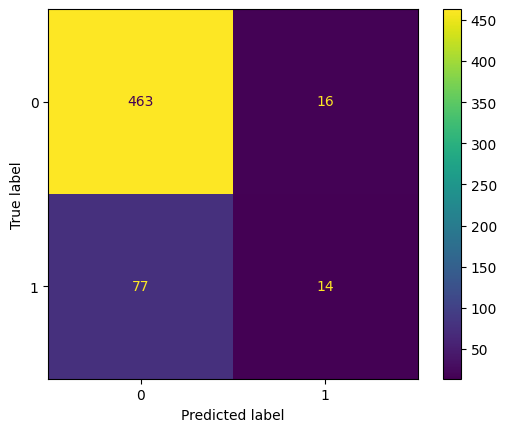

F1-score: 0.8005990572339982


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

gb_hyper = GradientBoostingClassifier(n_estimators=100,learning_rate=0.4,max_depth=1,random_state=42)
gb_hyper.fit(X_train_std,y_train)
gb_predictions = gb_hyper.predict(X_test_std)

print("Classification Report:")
print(classification_report(y_test, gb_predictions))

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, gb_predictions))
disp.plot()
plt.show()

print("F1-score:",f1_score(y_test,gb_predictions,average='weighted'))

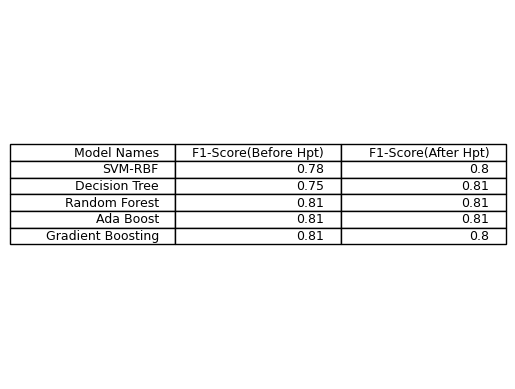

In [30]:
import matplotlib.pyplot as plt

data_score = [["Model Names","F1-Score(Before Hpt)","F1-Score(After Hpt)"],
              ["SVM-RBF",0.78,0.80],
              ["Decision Tree",0.75,0.81],
              ["Random Forest",0.81,0.81],
              ["Ada Boost",0.81,0.81],
              ["Gradient Boosting",0.81,0.80]]

data_table = plt.table(cellText=data_score,loc='center')
plt.axis('off')
plt.show()

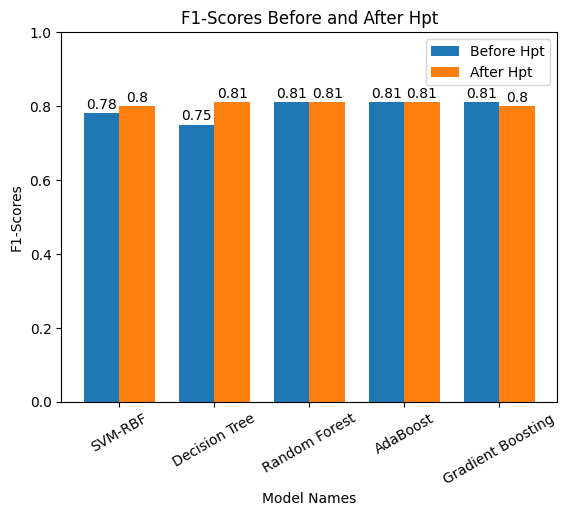

In [31]:
import matplotlib.pyplot as plt

model_names = ['SVM-RBF','Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
data_values = {'Before Hpt': [0.78,0.75,0.81,0.81,0.81],'After Hpt': [0.8,0.81,0.81,0.81,0.8]}
n = np.arange(0,10,2)
width = 0.75
mult = 0

for info,val in data_values.items():
    offset = width*mult
    bar_plot = plt.bar(n+offset,val,width,label=info)
    plt.bar_label(bar_plot,padding=1)
    mult += 1
plt.xlabel('Model Names')
plt.ylabel('F1-Scores')
plt.title('F1-Scores Before and After Hpt')
plt.xticks(n+width/2,model_names,rotation=30)
plt.legend(loc='upper right')
plt.ylim(0,1)
plt.show()

# Feature Reduction

In [32]:
from sklearn.decomposition import PCA
pca_red = PCA(n_components=3)

X_train_pca_3d = pca_red.fit_transform(X_train_std)
X_test_pca_3d = pca_red.transform(X_test_std)

X_train_pca_3d.shape

(1708, 3)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       479
           1       0.18      0.02      0.04        91

    accuracy                           0.83       570
   macro avg       0.51      0.50      0.47       570
weighted avg       0.74      0.83      0.77       570



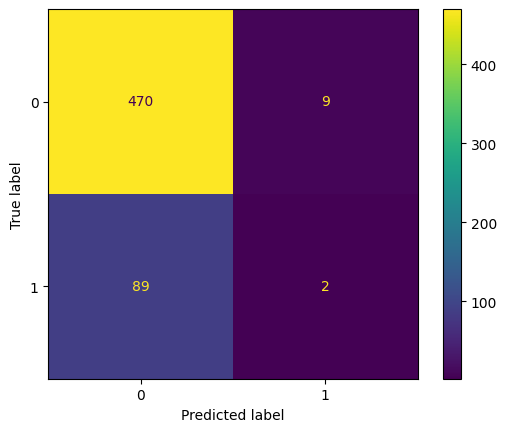

F1-score: 0.7672721415916534


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

ab_hyper = AdaBoostClassifier(n_estimators=90,learning_rate=0.4,random_state=42)
ab_hyper.fit(X_train_pca_3d,y_train)
ab_predictions_pca = ab_hyper.predict(X_test_pca_3d)

print("Classification Report:")
print(classification_report(y_test, ab_predictions_pca))

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, ab_predictions_pca))
disp.plot()
plt.show()

print("F1-score:",f1_score(y_test,ab_predictions_pca,average='weighted'))

# Feature Selection

In [34]:
from sklearn.feature_selection import SelectPercentile, f_classif

Selector = SelectPercentile(score_func=f_classif, percentile=50)
X_train_fs = Selector.fit_transform(X_train_std,y_train)
X_test_fs = Selector.transform(X_test_std)

print(X_train_fs.shape)
print("Features Selected:",Selector.get_feature_names_out(X.columns))

(1708, 3)
Features Selected: ['PAQ605' 'LBXGLU' 'LBXGLT']


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       479
           1       0.58      0.08      0.14        91

    accuracy                           0.84       570
   macro avg       0.72      0.53      0.53       570
weighted avg       0.81      0.84      0.79       570



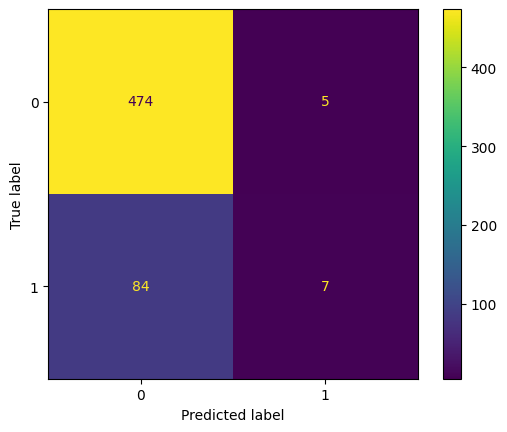

F1-score: 0.7899280693706067


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

ab_hyper = AdaBoostClassifier(n_estimators=90,learning_rate=0.4,random_state=42)
ab_hyper.fit(X_train_fs,y_train)
ab_predictions_fs = ab_hyper.predict(X_test_fs)

print("Classification Report:")
print(classification_report(y_test, ab_predictions_fs))

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, ab_predictions_fs))
disp.plot()
plt.show()

print("F1-score:",f1_score(y_test,ab_predictions_fs,average='weighted'))

# Data Visualization

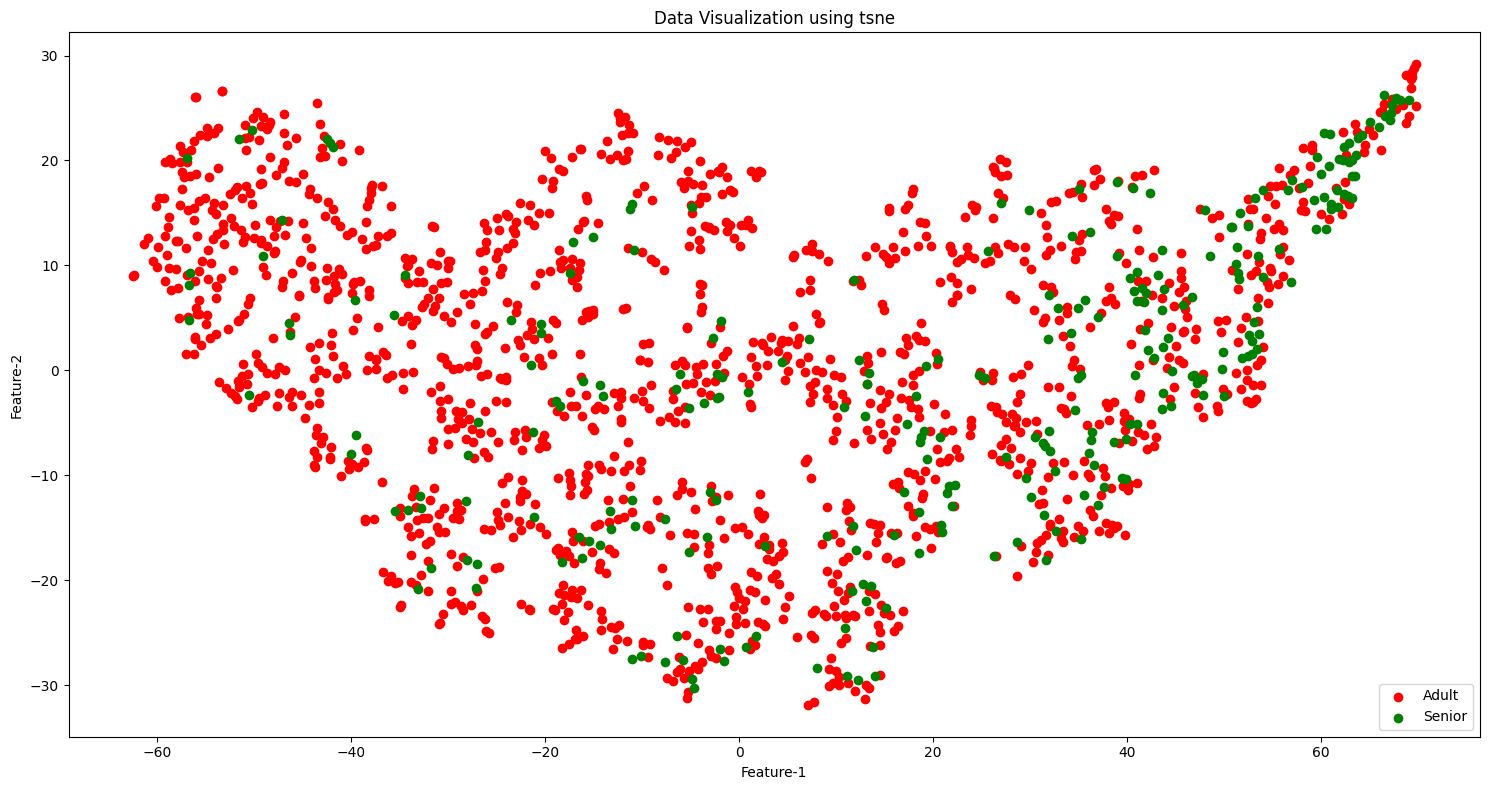

In [36]:
from sklearn import manifold

tsne_red = manifold.TSNE(n_components=2, init='pca', random_state=0)

X_tsne = tsne_red.fit_transform(X_train)
plt.figure(figsize=(15, 8))

plt.scatter(X_tsne[y_train==0,0],X_tsne[y_train==0,1],color='red',label="Adult")
plt.scatter(X_tsne[y_train==1,0],X_tsne[y_train==1,1],color='green',label="Senior")
plt.legend(loc="lower right")
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.title("Data Visualization using tsne")
plt.tight_layout()
plt.show()